In [1]:
import numpy as np
import cv2
from matplotlib import pylab as plt
from random import randint
from scipy import ndimage
from tqdm import tqdm #For progressbar

In [2]:
image = cv2.imread('symbols.jpg')

In [3]:
image.shape

(3456, 4608, 3)

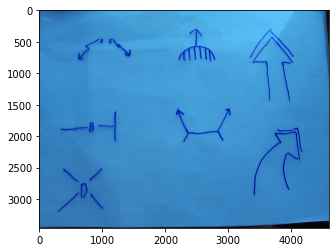

In [4]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### Main attack

True

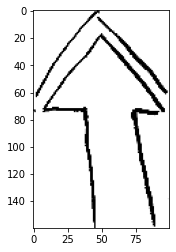

In [17]:
main_attack = image[250:1500,3300:4400]
main_attack_gray= cv2.cvtColor(main_attack, cv2.COLOR_BGR2GRAY)
main_attack_gray2 = np.copy(main_attack_gray)
main_attack_gray2[main_attack_gray2 < 110] = 0
main_attack_gray2[main_attack_gray2 >= 110] = 255
main_attack_gray2 = main_attack_gray2[np.amin(main_attack_gray2,axis=1) < 110,:] #Remove excess rows and columns from edges
main_attack_gray2 = main_attack_gray2[:,np.amin(main_attack_gray2,axis=0) < 110]
main_attack_gray2 = cv2.resize(main_attack_gray2, [100,160])
plt.imshow(main_attack_gray2,cmap='gray')
cv2.imwrite('main_attack1.jpg',main_attack_gray2)

### Main attack 2

True

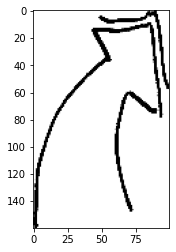

In [18]:
main_attack = image[1750:3200,3200:4400]
main_attack_gray= cv2.cvtColor(main_attack, cv2.COLOR_BGR2GRAY)
main_attack_gray2 = np.copy(main_attack_gray)
main_attack_gray2[main_attack_gray2 < 90] = 0
main_attack_gray2[main_attack_gray2 >= 90] = 255
main_attack_gray2 = main_attack_gray2[np.amin(main_attack_gray2,axis=1) < 110,:] #Remove excess rows and columns from edges
main_attack_gray2 = main_attack_gray2[:,np.amin(main_attack_gray2,axis=0) < 110]
main_attack_gray2 = cv2.resize(main_attack_gray2, [100,160])
plt.imshow(main_attack_gray2,cmap='gray')
cv2.imwrite('main_attack2.jpg',main_attack_gray2)

### Block

True

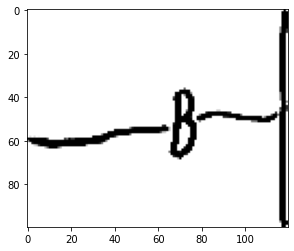

In [19]:
block = image[1500:2250,100:1500]
block_gray= cv2.cvtColor(block, cv2.COLOR_BGR2GRAY)
block_gray2 = np.copy(block_gray)
block_gray2[block_gray2 < 70] = 0
block_gray2[block_gray2 >= 70] = 255
block_gray2 = block_gray2[np.amin(block_gray2,axis=1) < 110,:] #Remove excess rows and columns from edges
block_gray2 = block_gray2[:,np.amin(block_gray2,axis=0) < 110]
block_gray2 = cv2.resize(block_gray2, [120,100])
plt.imshow(block_gray2,cmap='gray')
cv2.imwrite('block1.jpg',block_gray2)

### Destroy

True

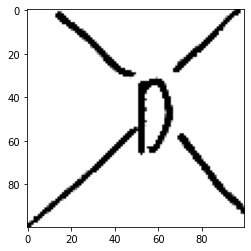

In [20]:
destroy = image[2250:3300,100:1500]
destroy_gray= cv2.cvtColor(destroy, cv2.COLOR_BGR2GRAY)
destroy_gray2 = np.copy(destroy_gray)
destroy_gray2[destroy_gray2 < 70] = 0
destroy_gray2[destroy_gray2 >= 70] = 255
destroy_gray2 = destroy_gray2[np.amin(destroy_gray2,axis=1) < 110,:] #Remove excess rows and columns from edges
destroy_gray2 = destroy_gray2[:,np.amin(destroy_gray2,axis=0) < 110]
destroy_gray2 = cv2.resize(destroy_gray2, [100,100])
plt.imshow(destroy_gray2,cmap='gray')
cv2.imwrite('destroy1.jpg',destroy_gray2)

### Screen

True

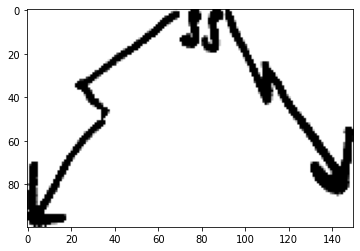

In [21]:
screen = image[450:780,610:1460]
screen_gray= cv2.cvtColor(screen, cv2.COLOR_BGR2GRAY)
screen_gray2 = np.copy(screen_gray)
screen_gray2[screen_gray2 < 70] = 0
screen_gray2[screen_gray2 >= 70] = 255
screen_gray2 = screen_gray2[np.amin(screen_gray2,axis=1) < 110,:] #Remove excess rows and columns from edges
screen_gray2 = screen_gray2[:,np.amin(screen_gray2,axis=0) < 110]
screen_gray2 = cv2.resize(screen_gray2, [150,100])
plt.imshow(screen_gray2,cmap='gray')
cv2.imwrite('screen1.jpg',screen_gray2)

### Support by fire

True

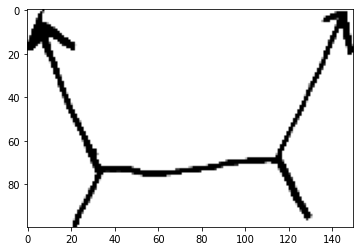

In [22]:
support_by_fire = image[1550:2100,2160:3060]
support_by_fire_gray= cv2.cvtColor(support_by_fire, cv2.COLOR_BGR2GRAY)
support_by_fire_gray2 = np.copy(support_by_fire_gray)
support_by_fire_gray2[support_by_fire_gray2 < 70] = 0
support_by_fire_gray2[support_by_fire_gray2 >= 70] = 255
support_by_fire_gray2 = support_by_fire_gray2[np.amin(support_by_fire_gray2,axis=1) < 110,:] #Remove excess rows and columns from edges
support_by_fire_gray2 = support_by_fire_gray2[:,np.amin(support_by_fire_gray2,axis=0) < 110]
support_by_fire_gray2 = cv2.resize(support_by_fire_gray2, [150,100])
plt.imshow(support_by_fire_gray2,cmap='gray')
cv2.imwrite('support_by_fire1.jpg',support_by_fire_gray2)

 ### Ambush

True

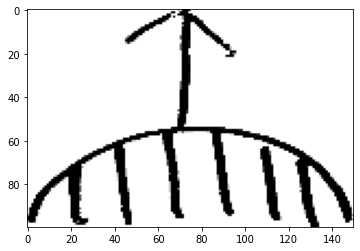

In [23]:
ambush = image[290:800,2200:2900]
ambush_gray= cv2.cvtColor(ambush, cv2.COLOR_BGR2GRAY)
ambush_gray2 = np.copy(ambush_gray)
ambush_gray2[ambush_gray2 < 70] = 0
ambush_gray2[ambush_gray2 >= 70] = 255
ambush_gray2 = ambush_gray2[np.amin(ambush_gray2,axis=1) < 110,:] #Remove excess rows and columns from edges
ambush_gray2 = ambush_gray2[:,np.amin(ambush_gray2,axis=0) < 110]
ambush_gray2 = cv2.resize(ambush_gray2, [150,100])
plt.imshow(ambush_gray2,cmap='gray')
cv2.imwrite('ambush1.jpg',ambush_gray2)

### Generate single symbol

In [30]:
def generate(bool_val = False, threshold = 0.999): #If bool_val = True, then random pixels are changed to black.
    #Select random image subclass
    select = randint(0,7)
    if select == 0:
        #Select random image from given class
        i = randint(1,1) #Currently only one image
        img = cv2.imread('screen'+str(i)+'.jpg', 0)
        label = 'screen'
    if select == 1:
        i = randint(1,1)
        img = cv2.imread('support_by_fire'+str(i)+'.jpg', 0)
        label = 'support_by_fire'
    if select == 2:
        i = randint(1,1)
        img = cv2.imread('ambush'+str(i)+'.jpg', 0)
        label = 'ambush'
    if select == 3:
        i = randint(1,1)
        img = cv2.imread('destroy'+str(i)+'.jpg', 0)
        label = 'destroy'
    if select == 4:
        i = randint(1,1)
        img = cv2.imread('block'+str(i)+'.jpg', 0)
        label = 'block'
    if select >= 5:
        i = randint(1,2)
        img = cv2.imread('main_attack'+str(i)+'.jpg', 0)
        label = 'main attack'
    
    #Randomize the size of the image
    img = cv2.resize(img, [randint(img.shape[1]-20,img.shape[1]+20),randint(img.shape[0]-20,img.shape[0]+20)])
    #Flip the image half of the time.
    if randint(0,1) == 1:
        img = cv2.flip(img,1)
    #Randomize the rotation of the image.
    img = ndimage.rotate(img, randint(0,359), mode='constant',cval=255)
    #Add padding for affine transformation. Otherwise the picture might not be in bounds.
    img = np.pad(img, (100, 100), 'constant', constant_values=(255, 255))
    #Originial right triangle
    pts1 = np.float32([[3,3],[3,10],[10,3]])
    #Randomly transformed triangle
    i = randint(0,2)
    if i == 0:
        pts2 = np.float32([[randint(1,5),randint(1,5)],[3,10],[10,3]])
    if i == 1:
        pts2 = np.float32([[3,3],[randint(1,5),randint(8,12)],[10,3]])
    if i == 2:
        pts2 = np.float32([[3,3],[3,10],[randint(8,12),randint(1,5)]])
    #Get transformation
    M = cv2.getAffineTransform(pts1,pts2)
    #Apply transformation
    img  = cv2.warpAffine(img ,M,(img.shape[1],img.shape[0]),borderValue = 255)
    #Remove excess rows and columns that appeared after rotation and padding
    img = img[np.amin(img,axis=1) < 120,:]
    img = img[:,np.amin(img,axis=0) < 120]
    
    #Randomize the dilation and erosion
    
    #If randint = 2, then we apply neither.
    kernel = np.ones((3,3),np.uint8) #Kernel 3x3 seemed to work fine.
    i = randint(0,2)
    if i == randint(0,1): #erode 1 iteration. #OpenCV erodes white to black. In our case function erode actually dilates.
        img = cv2.erode(img,kernel,iterations = 1)
    if i == randint(0,1): #erode 2 iteration
        img = cv2.erode(img,kernel,iterations = 2)
    
    #Apply also noise by closing.
    if i == randint(0,1): #CLOSE
        img = cv2.morphologyEx(img,cv2.MORPH_OPEN, kernel)
    
    #Apply noise by changing random pixels to one.
    if bool_val:
        img[np.random.rand(img.shape[0],img.shape[1]) > threshold] = 0
        
    return img, label

### Generate full image

In [34]:
def generate_image(min_symbols = 5, max_symbols = 10):
    canvas = np.full((1060,800),255) #Size of final image
    locations = [] #Store location of the symbols
    labels = [] #Store labels
    for task in range(randint(min_symbols,max_symbols)):
        img, label = generate()
        labels.append(label)
        #Get the random location on canvas
        point1 = randint(0,800-img.shape[1])
        point2 = randint(0,1060-img.shape[0])

        locations.append(((point1,point2),(point1+img.shape[1],point2+img.shape[0])))
        canvas[point2:(point2+img.shape[0]),point1:(point1+img.shape[1])][img < 100] = img[img < 100]
    return canvas, locations, labels

In [35]:
canvas,locations,labels = generate_image()

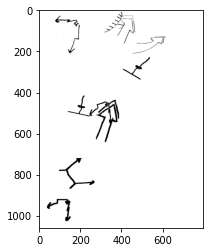

In [36]:
plt.imshow(canvas,cmap='gray')

### Generate multiple examples

In [38]:
data = np.zeros((100,1060,800))
locarions = []
labels = []
for i in tqdm(range(100)):
    data[i,:,:], location, label = generate_image()
    locations.append(location)
    labels.append(label)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 32.00it/s]


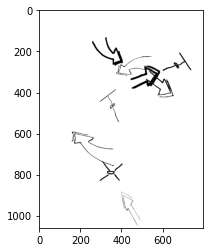

In [39]:
plt.imshow(data[20,:,:],cmap='gray')